# PETI8123 Lab 6: Prediction

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## 1. Linear Regression

Linear regression models the relationship between dependent and independent variables. It is widely used in statistics, economics, social sciences, and machine learning. The goal is to find the best-fitting line that represents the relationship between the variables.

In this lab, we use a student marks dataset to experiment with linear regression.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Read data from a CSV file into a pandas DataFrame (df)
path = '/content/drive/MyDrive/Innovations in Technology and Education/'
df = pd.read_csv(path + "lab6_student_marks.csv")

In [9]:
# Display the first 5 rows of the DataFrame 'df' to inspect the data
df.head(5)

,number_courses,time_study,marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [10]:
# Retrieve and display information about the DataFrame df,
# including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Some explanations:**

The dataset has 100 rows with 3 columns.

The features are:
* ``number_courses``: The number of courses that a particular student has enrolled in
* ``time_study``: The number of hours that a student studies

Target columns:
* ``marks``: The average marks scored by the student

In [11]:
# Generate descriptive statistics for the DataFrame df,
# including measures like mean, min, max, etc.
df.describe()

,number_courses,time_study,marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [12]:
# Extract the values from the 'time_study' and 'marks' columns
# of the DataFrame 'df' and assign them to variables 'x' and 'y' respectively
x = df['time_study'].values
y = df['marks'].values

# Display the values of 'x' and 'y'
print(x)
print(y)

[4.508 0.096 3.133 7.909 7.811 3.211 6.063 3.413 4.41  6.173 7.353 0.423
 4.218 4.274 2.908 4.26  5.719 6.08  7.711 3.977 4.733 6.126 2.051 4.875
 3.635 1.407 0.508 4.378 0.156 1.299 3.864 1.923 0.932 6.594 4.083 7.543
 2.966 7.283 6.533 7.775 0.14  2.754 3.591 1.557 1.954 2.061 3.797 4.779
 5.635 3.913 6.703 4.13  0.771 6.049 7.591 2.913 7.641 7.649 6.198 7.468
 0.376 2.438 3.606 4.869 0.13  2.142 5.473 0.55  1.395 3.948 3.736 2.518
 4.633 1.629 6.954 0.803 6.379 5.985 7.451 0.805 7.957 2.262 7.41  3.197
 1.982 6.201 4.067 1.033 1.803 6.376 4.182 2.73  5.027 6.471 3.919 3.561
 0.301 7.163 0.309 6.335]
[19.202  7.734 13.811 53.018 55.299 17.822 29.889 17.264 20.348 30.862
 42.036 12.132 24.318 17.672 11.397 19.466 30.548 38.49  50.986 25.133
 22.073 35.939 12.209 28.043 16.517  6.623 12.647 26.532  9.333  8.837
 24.172  8.1   15.038 39.965 17.171 43.978 13.119 46.453 41.358 51.142
  7.336 15.725 19.771 10.429  9.742  8.924 16.703 22.701 26.882 19.106
 40.602 22.184  7.892 36.653 53.158

Draw a scatter plot for ``time_study`` and ``marks`` to show if it is linear and suitable for linear regression modelling.

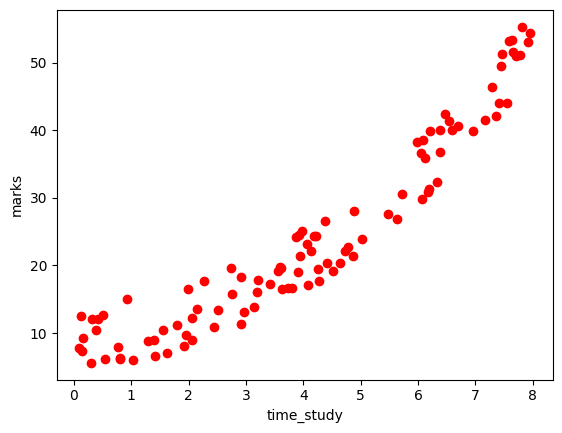

In [13]:
# Create a scatter plot using the 'x' and 'y' data with red color
plt.scatter(x, y, color='red')

# Set the label for the x-axis
plt.xlabel('time_study')

# Set the label for the y-axis
plt.ylabel('marks')

# Display the plot
plt.show()

In [14]:
# Reshape the 'x' array to have a single column, using -1 to infer the number of rows automatically
x = x.reshape(-1, 1)

# Observe the difference now
print(x)

[[4.508]
 [0.096]
 [3.133]
 [7.909]
 [7.811]
 [3.211]
 [6.063]
 [3.413]
 [4.41 ]
 [6.173]
 [7.353]
 [0.423]
 [4.218]
 [4.274]
 [2.908]
 [4.26 ]
 [5.719]
 [6.08 ]
 [7.711]
 [3.977]
 [4.733]
 [6.126]
 [2.051]
 [4.875]
 [3.635]
 [1.407]
 [0.508]
 [4.378]
 [0.156]
 [1.299]
 [3.864]
 [1.923]
 [0.932]
 [6.594]
 [4.083]
 [7.543]
 [2.966]
 [7.283]
 [6.533]
 [7.775]
 [0.14 ]
 [2.754]
 [3.591]
 [1.557]
 [1.954]
 [2.061]
 [3.797]
 [4.779]
 [5.635]
 [3.913]
 [6.703]
 [4.13 ]
 [0.771]
 [6.049]
 [7.591]
 [2.913]
 [7.641]
 [7.649]
 [6.198]
 [7.468]
 [0.376]
 [2.438]
 [3.606]
 [4.869]
 [0.13 ]
 [2.142]
 [5.473]
 [0.55 ]
 [1.395]
 [3.948]
 [3.736]
 [2.518]
 [4.633]
 [1.629]
 [6.954]
 [0.803]
 [6.379]
 [5.985]
 [7.451]
 [0.805]
 [7.957]
 [2.262]
 [7.41 ]
 [3.197]
 [1.982]
 [6.201]
 [4.067]
 [1.033]
 [1.803]
 [6.376]
 [4.182]
 [2.73 ]
 [5.027]
 [6.471]
 [3.919]
 [3.561]
 [0.301]
 [7.163]
 [0.309]
 [6.335]]


To train a regression model, split your data into train and test portions:

In [15]:
# Import the 'train_test_split' function from the 'sklearn.model_selection' module for
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the 'x' and 'y' data into training and testing sets with a train-to-test ratio of 80% to 20%
# The 'random_state' parameter is set to 300 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=300)

Fit the data from the training split to the regression model:

In [16]:
# Import the 'LinearRegression' class from the 'sklearn.linear_model' module for linear regression
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr = LinearRegression()

# Fit the model to the training data 'x_train' and 'y_train'
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
# Use the trained linear regression model 'lr' to make predictions for a given input value (e.g., 3.133)
y_predict = lr.predict([[3.133]])

# Display the predicted value
print(y_predict)

[19.13634964]


In [19]:
# Use the trained linear regression model 'lr' to make predictions on the testing data 'x_test'
y_predict = lr.predict(x_test)

# Display the predicted values for the testing data
print(y_predict)

[45.90060542 36.80813852 22.96475676  4.24361532 26.31461298  8.56210468
 20.75073818 24.61373934  6.44610255 30.056535    3.51137481 36.12778906
 35.58005009 19.50535273 27.78485969 21.77702804 36.02977261 44.03252725
 24.52148857 21.60405784]


Show your regression model's score:

In [20]:
# Calculate and display the R-squared score of the linear regression model
# on the testing data 'x_test' and 'y_test'
# Multiply the score by 100 to express it as a percentage
lr.score(x_test, y_test) * 100

82.43985781154939

Show the plot for ``x_train, y_train, x_test``, and mark predictions:

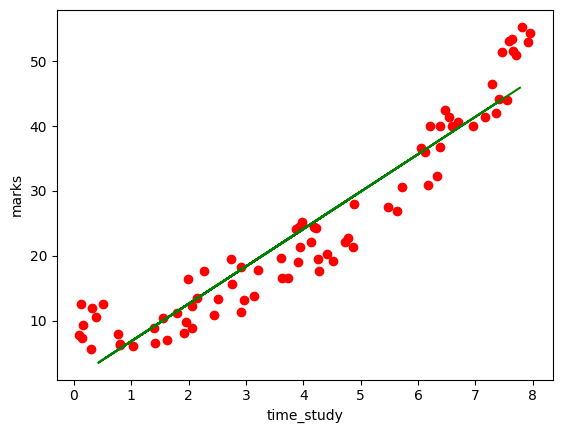

In [21]:
# Create a scatter plot using the training data 'x_train' and 'y_train' with red color
plt.scatter(x_train, y_train, color='red')

# Create a line plot using the testing data 'x_test' and the predicted values 'y_predict' with green color
plt.plot(x_test, y_predict, color='green')

# Set the label for the x-axis
plt.xlabel('time_study')

# Set the label for the y-axis
plt.ylabel('marks')

# Display the plot
plt.show()

## 2. Random Forest and Support Vector Regression

Random Forest is an ensemble learning method used for classification, regression, and other tasks. It constructs multiple decision trees during training and outputs the class selected by most trees for classification tasks or the mean or average prediction of the individual trees for regression tasks.

Support Vector Regression (SVR) is another type of machine learning algorithm used for regression analysis. The goal of SVR is to find a function that approximates the relationship between the input variables and a continuous target variable, while minimizing the prediction error.

In [23]:
# Read the data from the CSV file and store it in the 'data' DataFrame
data = pd.read_csv(path + "lab6_student_marks.csv")

# Print the shape of the DataFrame (number of rows and columns)
print(data.shape, '\n')

# Display the first 10 rows of the DataFrame for data inspection
data.head(10)

(100, 3) 



,number_courses,time_study,marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
5,6,3.211,17.822
6,3,6.063,29.889
7,5,3.413,17.264
8,4,4.410,20.348
9,3,6.173,30.862


### 2.1. Number of Courses and Marks

We want to examine the relationship between the number of courses taken by students and their marks.

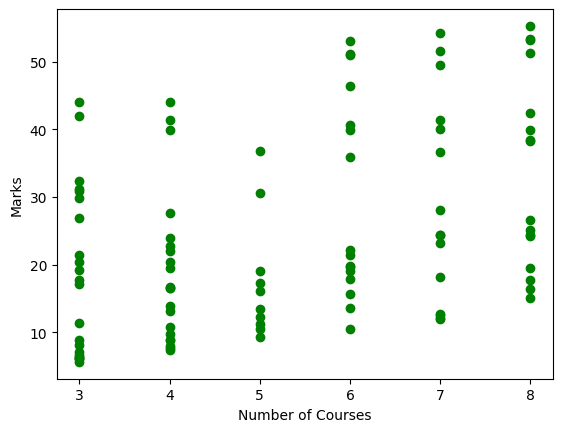

In [24]:
# Create a scatter plot to visualize the relationship between 'Number of Courses' and 'Marks'
plt.scatter(x=data['number_courses'], y=data['marks'], c='g')

# Set the label for the x-axis
plt.xlabel("Number of Courses")

# Set the label for the y-axis
plt.ylabel("Marks")

# Display the plot
plt.show()

**Some observations:**
* Students opting for more number of courses also score higher than the students opting for lesser number of courses.
* Students opting for six or more courses are likely to score more than the students opting for five or less courss.

### 2.2. Study Time and Marks

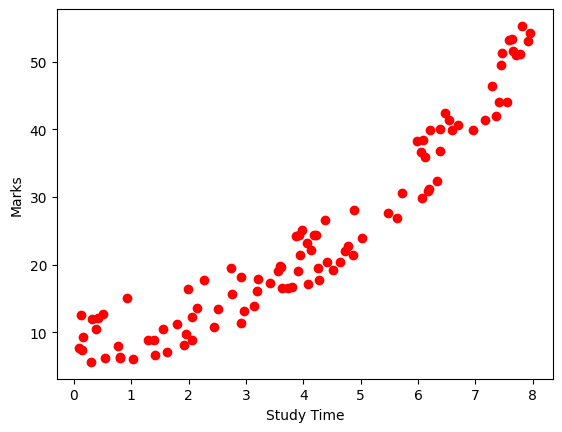

In [25]:
# Create a scatter plot to visualize the relationship between 'Study Time' and 'Marks'
plt.scatter(x=data['time_study'], y=data['marks'], c='r')

# Set the label for the x-axis
plt.xlabel("Study Time")

# Set the label for the y-axis
plt.ylabel("Marks")

# Display the plot
plt.show()

**Observation:**

* Students spending more time studying have more marks. This is what happen likely in reality.  

### 2.3. Study Time and Number of Courses

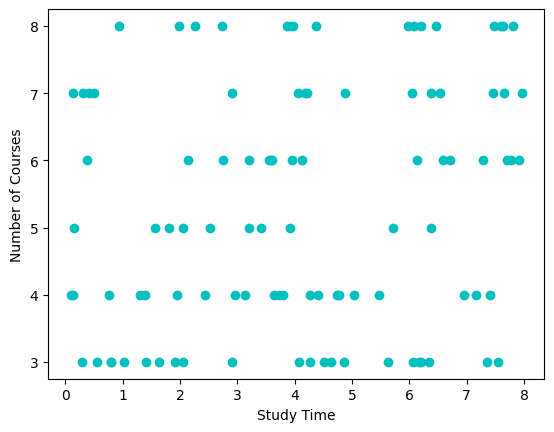

In [26]:
# Create a scatter plot to visualize the relationship between 'Study Time' and 'Number of Courses'
plt.scatter(x=data['time_study'], y=data['number_courses'], c='c')

# Set the label for the x-axis
plt.xlabel("Study Time")

# Set the label for the y-axis
plt.ylabel("Number of Courses")

# Display the plot
plt.show()

**Observations:**

* Students opting for more number of subjects are likely to spend more time studying.
* Students opting for six or more subjects spend more time studying than students opting for five or less subjects

### 2.4. Model Development

In [27]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target column (y)
X = data[['number_courses', 'time_study']]
y = data['marks']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shapes - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Testing set shapes - X_test:", X_test.shape, "y_test:", y_test.shape)

# Scaling the features using Min-Max scaling, which is important for some ML models
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

Training set shapes - X_train: (80, 2) y_train: (80,)
Testing set shapes - X_test: (20, 2) y_test: (20,)


Training a Linear, Random Forest and Support Vector Regression models:

In [28]:
# Import the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr_model = LinearRegression()

# Fit the Linear Regression model to the training data
lr_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
lr_preds = lr_model.predict(X_test)

In [29]:
# Import the RandomForestRegressor class from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Fit the RandomForestRegressor model to the training data
rf_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
rf_preds = rf_model.predict(X_test)

In [30]:
# Import the Support Vector Regression (SVR) class from sklearn.svm
from sklearn.svm import SVR

# Create an instance of the Support Vector Regression (SVR) model
svr_model = SVR()

# Fit the SVR model to the training data
svr_model.fit(X_train, y_train)

# Use the trained SVR model to make predictions on the test data
svr_preds = svr_model.predict(X_test)

Evaluating these models using a metric called Mean Absolute Error (MAE):

In [31]:
# Import the mean_absolute_error function from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Calculate and print the Mean Absolute Error (MAE) for the Linear Regression model's performance
print(f"Performance of Linear Regression: MAE = {mean_absolute_error(y_test, lr_preds)}")

# Calculate and print the Mean Absolute Error (MAE) for the Random Forest Regression model's performance
print(f"Performance of Random Forest Regression: MAE = {mean_absolute_error(y_test, rf_preds)}")

# Calculate and print the Mean Absolute Error (MAE) for the Support Vector Regression model's performance
print(f"Performance of Support Vector Regression: MAE = {mean_absolute_error(y_test, svr_preds)}")

Performance of Linear Regression: MAE = 3.0793452296666834
Performance of Random Forest Regression: MAE = 1.208893500000004
Performance of Support Vector Regression: MAE = 5.675125230287849


**Conclusion:**

Random Forest model is found to be the best with error of 1.23, which means if we predict a student's marks based on the number of courses and study time, we have the error by maximum of 1.23 marks.

Once we choose the best model with our data, we can apply this model by providing the number of courses and study time:

(Ignore the warning at the end)

In [32]:
# Assume that we have two students with following data
# Define a dictionary 'student_1' representing the information of the first student
student_1 = {'num_courses': 7, 'study_time': 7}

# Define a dictionary 'student_2' representing the information of the second student
student_2 = {'num_courses': 2, 'study_time': 5}

In [33]:
# Predict the marks of Student 1 using the Random Forest Regression model
predicted_marks_student_1 = rf_model.predict(np.array([list(student_1.values())]))

# Predict the marks of Student 2 using the Random Forest Regression model
predicted_marks_student_2 = rf_model.predict(np.array([list(student_2.values())]))

# Print the predicted marks for Student 1 and Student 2
print(f"Marks of Student 1 will be: {predicted_marks_student_1}")
print(f"Marks of Student 2 will be: {predicted_marks_student_2}")

Marks of Student 1 will be: [41.42]
Marks of Student 2 will be: [23.32517]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## ⚠️ Exercise

Supply the data of Student 1 and 2 to another model (e.g., SVR) and observe the difference of the prediction.

In [36]:
svr_pred_stu1 = svr_model.predict(np.array([list(student_1.values())]))
print(f"Marks of Student 1 will be (SVR): {svr_pred_stu1}")

svr_pred_stu2 = svr_model.predict(np.array([list(student_2.values())]))
print(f"Marks of Student 2 will be (SVR): {svr_pred_stu2}")

Marks of Student 1 will be (SVR): [35.48235577]
Marks of Student 2 will be (SVR): [21.76864095]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [37]:
lr_pred_stu1 = lr_model.predict(np.array([list(student_1.values())]))
print(f"Marks of Student 1 will be (LR): {lr_pred_stu1}")

lr_pred_stu2 = lr_model.predict(np.array([list(student_2.values())]))
print(f"Marks of Student 1 will be (LR): {lr_pred_stu2}")

Marks of Student 1 will be (LR): [42.67690481]
Marks of Student 1 will be (LR): [22.97941186]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
